# Plotting and Data Visualization

```{admonition} Overview
:class: overview

Questions:

* How do I visualize data by making graphs?

Objectives:

* Plot data from a 'pandas dataframe'.

* Label and customize graph.

* Save figures to files.

* Plot multiple graphs on one figure.

* Create multiple figures using a 'for' loop
```

Plotting is one of the most effective methods of representing numerical data and illustrating their patterns and trends.  There are a number of applications that facilitate graph creation (Excel, Origin, SciDavis, etc.), but these methods can be time consuming, tedious, and at times inflexible.  We have already seen the potential of coding for reading/editing/saving multiple files at once, as well as in creating tables from raw data in a 'CSV' file.  Taking what we have learned so far, we will focus in this module on creating plots from the data in the previous lesson, customizing the plots with color, design, labels and legends, and using loops to create multiple figures at once.

### Prepare data for plotting

First, we need to import pandas and load our data into variables.  These lines should look familiar from the previous lesson.


In [2]:
import pandas as pd

distance_file = "data/distance_data_headers.csv"

distances = pd.read_csv(distance_file)

distances

,Frame,THR4_ATP,THR4_ASP,TYR6_ATP,TYR6_ASP
0,1,8.9542,5.8024,11.5478,9.9557
1,2,8.6181,6.0942,13.9594,11.6945
2,3,9.0066,6.0637,13.0924,11.3043
3,4,9.2002,6.0227,14.5282,10.1763
4,5,9.1294,5.9365,13.5321,10.6279
...,...,...,...,...,...
9995,9996,8.5083,7.7587,9.1789,10.6715
9996,9997,8.9524,7.4681,9.5132,10.9945
9997,9998,8.6625,7.7306,9.5469,10.3063
9998,9999,9.2456,7.8886,9.8151,10.7564


## Plotting Data

A data set is plotted using the 'plot()' function of matplotlib.pyplot.  By using the pandas DataFrame object for our tabular data, we can refer to the desired column by its header name.  If you want to see how this simplifies working with our data, check out the "Prepare for Plotting section" at the top of the [original lesson](https://education.molssi.org/python_scripting_cms/05-plotting/index.html) from which this one was adapted.

In [3]:
import matplotlib.pyplot as plt

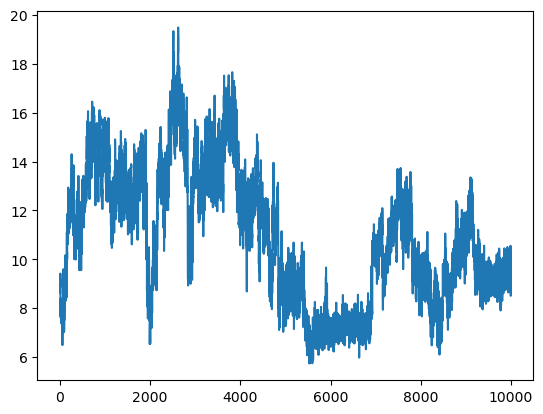

In [4]:
plt.figure()     #This initializes a new figure
plt.plot(distances["THR4_ATP"])

``````{admonition} Check Your Understanding
:class: exercise

How would you get make the same plot using the iloc command? 

````{admonition} Solution
:class: solution dropdown

```python
# THR4_ATP is the second column, and we want all rows
plt.figure()
plt.plot(distances.iloc[:,1])
```
````
``````

### Plotting with x and y

The data here are relatively straightforward, with the Frame column serving as a simple x value for the rest of the columns.  Often however, it is necessary to show trends or patterns in data in relation to a variety of independent variables.  If you have data that contains multiple x columns, it can be helpful to specify the x and y values we wish to use.  In with 'pyplot', the first two parameters in the 'plot()' function are 'x' and 'y' by default.

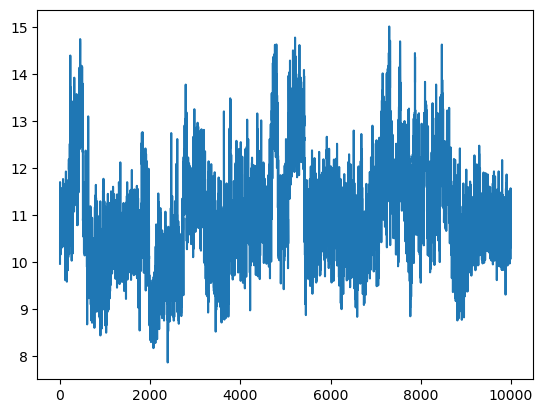

In [5]:
plt.figure()
plt.plot(distances["Frame"], distances["TYR6_ASP"])

It may be a little hard to see the effects of changing the style of the plot at this scale.
Let's slice our data so we can only see the first 100 points.

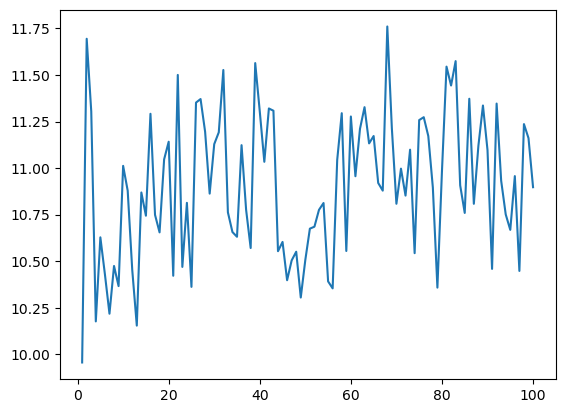

In [6]:
plot_data = distances.iloc[0:100,:]

plt.figure()
plt.plot(plot_data["Frame"], plot_data["TYR6_ASP"])

### Labels and Legends

If we are creating a plot to add to a report or presentation, we will want to add labels to our axes and a legend to our plot.  We can do this using the 'xlabel()', 'ylabel()', and 'legend()' functions.  The 'legend()' function takes a list of strings as an argument, which will be used to label each line in the order they were plotted.

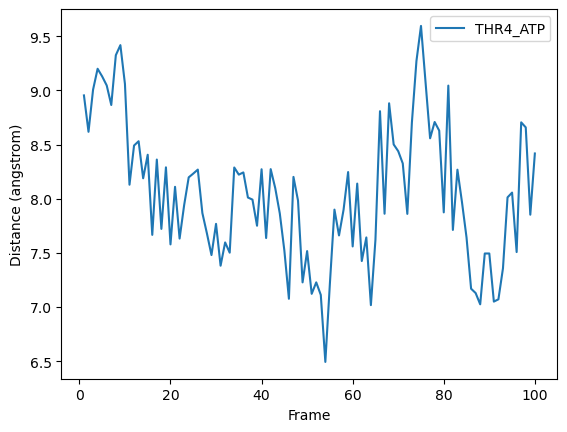

In [8]:
plt.figure()
plt.xlabel('Frame')
plt.ylabel('Distance (angstrom)') 

plt.plot(plot_data["Frame"], plot_data["THR4_ATP"], label="THR4_ATP")
plt.legend()

## Plotting more than one data set at a time

To plot more than one dataset at a time, we can pass multiple columns
to the 'plot()' function. We can label the data using the headers of the
dataframe by passing the column names to the 'label' keyword argument

In [13]:
x_column = plot_data["Frame"]
y_columns = plot_data.iloc[:,1:]
labels = y_columns.columns

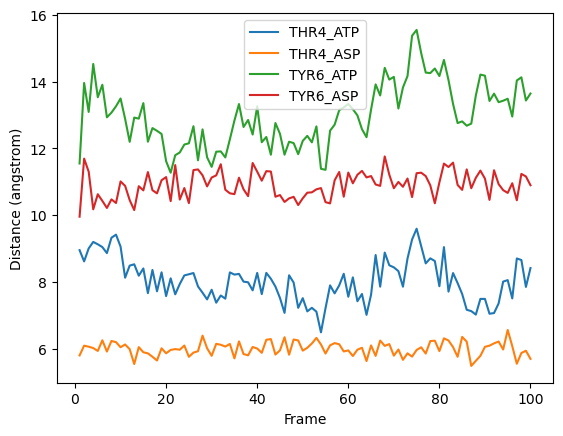

In [14]:
plt.figure()
plt.xlabel('Frame')
plt.ylabel('Distance (angstrom)') 

plt.plot(x_column, y_columns, label=labels)
plt.legend()

### Different kinds of charts

Matplotlib can make a variety of plots.
If you're using `plt.plot`, you can change the line and marker style by adding a string before the "label" argument.

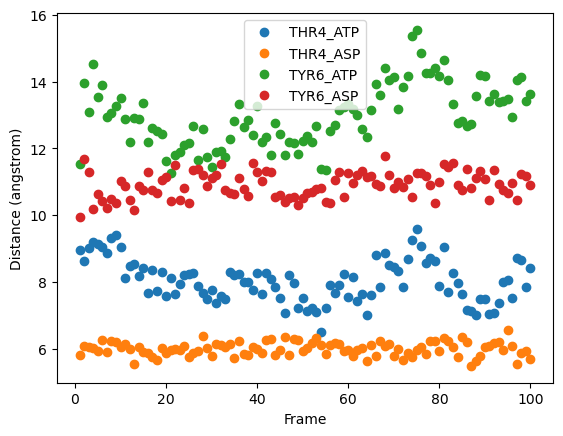

In [15]:
plt.figure()
plt.xlabel('Frame')
plt.ylabel('Distance (angstrom)') 

plt.plot(x_column, y_columns, 'o', label=labels)
plt.legend()

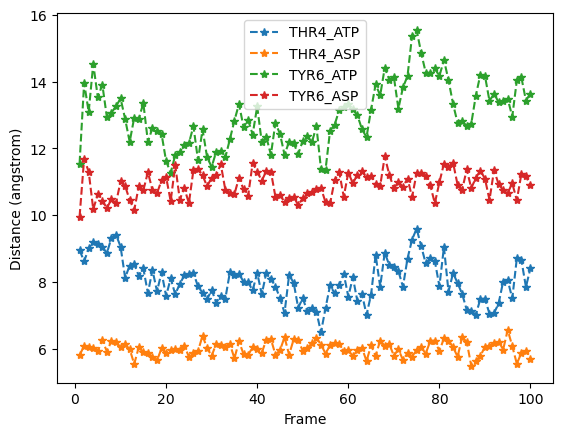

In [16]:
plt.figure()
plt.xlabel('Frame')
plt.ylabel('Distance (angstrom)') 

plt.plot(x_column, y_columns, '--*', label=labels)
plt.legend()

Here is a list of options you can use.

character | description
----------|------------
`'-'`	| solid line style
`'--'`	| dashed line style
 `'-.'` |	dash-dot line style
 `':'`  | dotted line style
 `'.'`  | point marker
 `','`  | pixel marker
 `'o'`  | circle marker
 `'v'`  | triangle_down marker
 `'^'`  | triangle_up marker
 `'<'`  | triangle_left marker
 `'>'`  | triangle_right marker
 `'1'`  | tri_down marker
 `'2'`  | tri_up marker
 `'3'`  | tri_left marker
 `'4'`  | tri_right marker
 `'s'`  | square marker
 `'p'`  | pentagon marker
 `'*'`  | star marker
 `'h'`  | hexagon1 marker
 `'H'`  | hexagon2 marker
 `'+'`  | plus marker
 `'x'`  | x marker
 `'D'`  | diamond marker
 `'d'`  | thin_diamond marker
 `'_'`  | hline marker

### Changing color and image size

Before saving, let's first learn how to change the colors and image size of our plots.  For more customizations see the [matplotlib.pyplot.plot function api](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

The axes can also be customized using the [plt.axes api](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axes.html)

```{admonition} Plotting with pandas
:class: tip

pandas has plotting functionality as well, using the syntax dataframe.plot().  It is particularly efficient at creating normal/stacked/nested bar graphs and pie charts.  If this is useful to you, check out the [DataFrame.plot API](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)
```

### Saving the Figure and Setting the Resolution

Set the resolution when you save the image using the syntax 'figure.savefig(filename, dpi)'

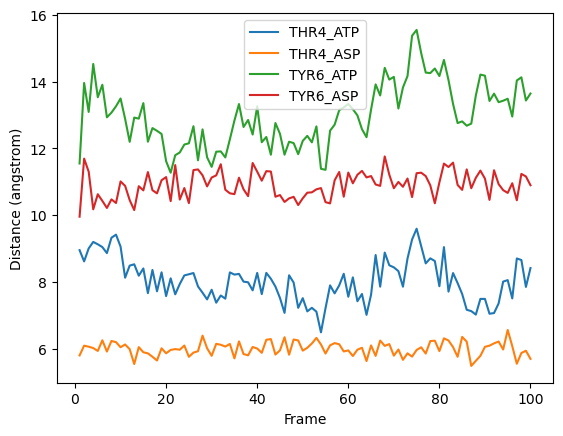

In [22]:

plt.figure()
plt.xlabel('Frame')
plt.ylabel('Distance (angstrom)') 

plt.plot(x_column, y_columns, label=labels)
plt.legend()
plt.savefig(f'first_100_frames.png', dpi=300)

### Multiple Figures Using Loops

Suppose instead in our reporting we wanted to discuss each plot in turn.  As long as the settings are consistent, we can generate, modify, and save a series of figures with a single block of code!

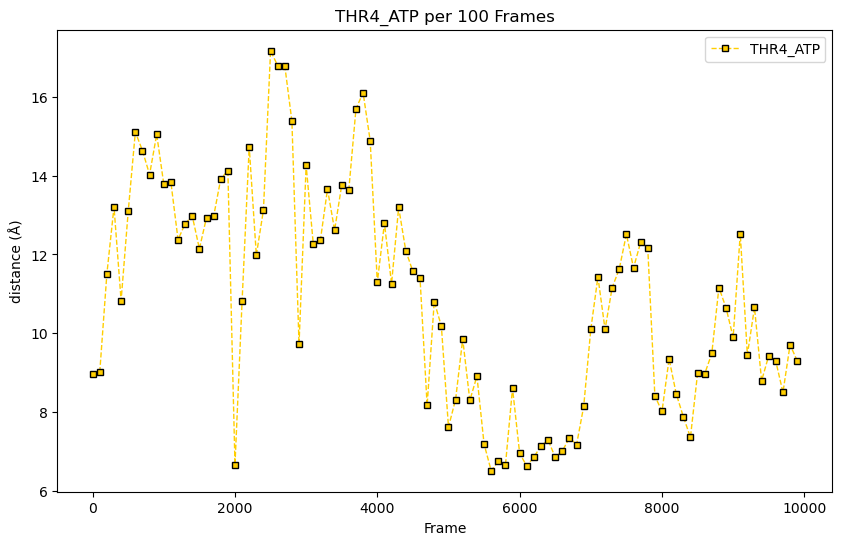

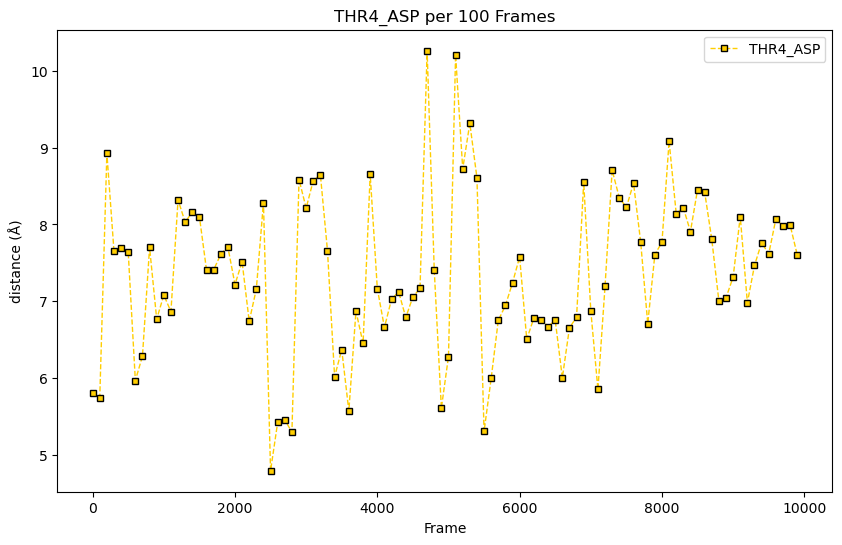

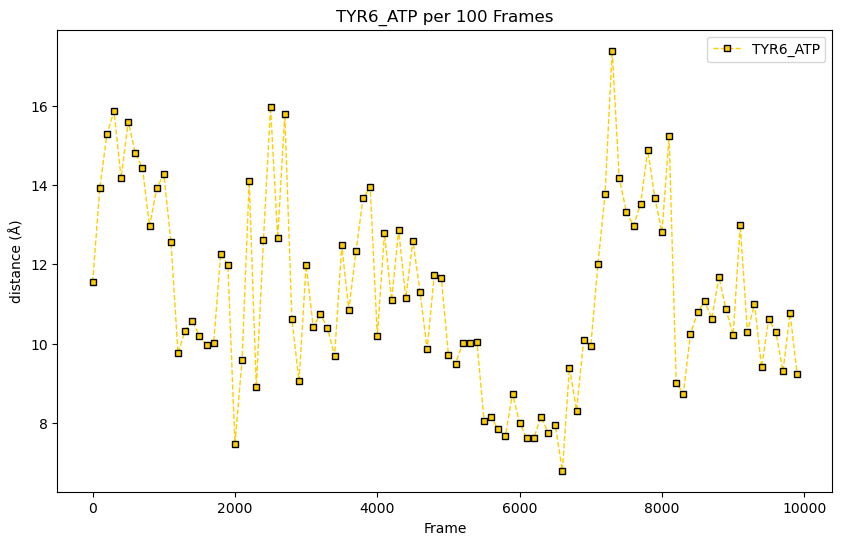

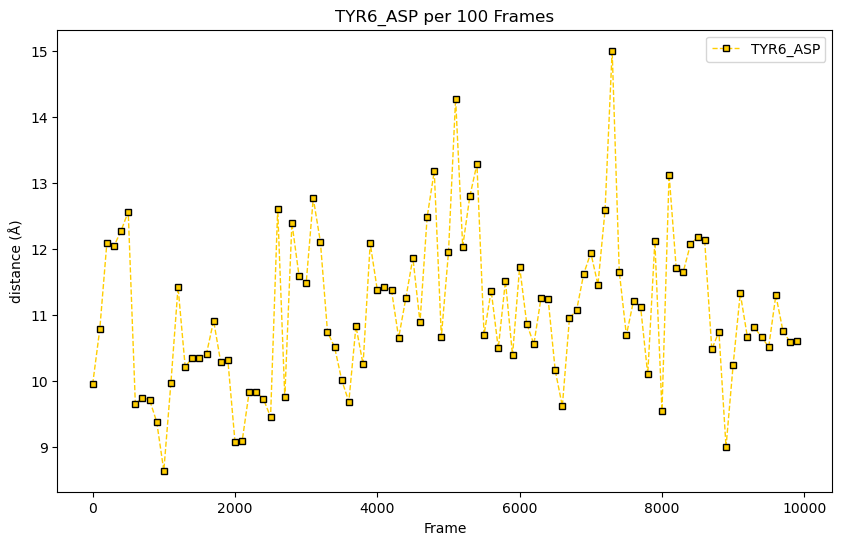

In [16]:
# loop through the list of headers, creating a new figure with each cycle
for i in range(1,len(top)): 
    fname = f"{top[i]}.png"
    plt.figure(figsize=(10, 6))
    plt.xlabel('Frame')
    plt.ylabel('distance (\u212B)')
    plt.title(f'{top[i]} per 100 Frames')
    plt.plot(
        distances.iloc[::100,0], 
        distances.iloc[::100,i], 
        '--s', 
        color='#FFCE00',
        markersize=4, 
        markeredgecolor='000000',
        markeredgewidth=1,
        linewidth=1, 
        label=top[i]
    )
    plt.legend()
    plt.savefig(fname, dpi=300)

#### range(len(list))

There are five headers in our data, so the 'len(top)' function returns 5.  Taking the range of the length however, returns a list object iterating over the indices of the list in the length function.
So:
    len(top) == 5
but
    range(len(top)) == [0,1,2,3,4]
so
    range(1,len(top)) == [1,2,3,4]

``````{admonition} Challenge time!
:class: exercise

In our data reporting, it has been decided that we need to take each of the plots and overlay an average of all the samples for comparison.  We'll need to create a column of the average distances between the 4 existing columns and graph that on top of each sample plot.  This will be too busy though, so we only want to graph one point for every hundred. Don't have a lot of time either, so best use a for loop.

````{admonition} Solution
:class: solution dropdown

```python
# 1 - add the averages column
distances['mean'] = distances.iloc[:,1:4].mean(axis=1)

# 2 - create the figures
for i in range(1,len(top)): 
    fname = f"{top[i]}.png"
    plt.figure(figsize=(10, 6))
    plt.xlabel('Frame')
    plt.ylabel('distance (\u212B)')
    plt.title(f'{top[i]} per 100 Frames')
    plt.plot(
        distances.iloc[::100,0], 
        distances.iloc[::100,i], 
        '-s', 
        color='#FFCE00',
        markersize=4, 
        markeredgecolor='000000',
        markeredgewidth=1,
        linewidth=1, 
        label=top[i]
    )
    plt.plot(
        distances.iloc[::100,0], 
        distances.iloc[::100,5], 
        '--', 
        color='#2C7619',
        linewidth=1, 
        label='mean'
    )
    plt.legend()
    plt.savefig(fname, dpi=300)
```
````
``````

``````{admonition} Key Points
:class: key

* Use pandas to generate figures from tabular data with the 'plot()' function

* Create a variety of chart types with either the 'kind' keyword or the chart method

* Add labels, legends, color, and other stylistic choices to figures by passing parameters to plot

* Work with multiple data sets, either with the 'iloc[]' syntax, 'for' loops, or simple overlay

* Use the matplotlib.pyplot functions 'get_figure()' and 'savefig()' to save the figure to a file

``````